In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, manifold
from sklearn.cluster import DBSCAN

import random

In [2]:
df1 = pd.read_csv('Source/dataset_full.csv', index_col=0)
df1

/tmp/ipykernel_587232/3376001235.py:1: DtypeWarning: Columns (25,145,146,157,175,183,292,323,324,325,353,385,386,387,388,389,390,391,392,393,394,395,415,416,435,478,479,480,481,482,483,500,503,504,505,513,515,519,617,691,722) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Source/dataset_full.csv', index_col=0)


,В100 (Тл) лист лучший,В800 (Тл) лист лучший,"P1,5/50 (Вт / Кг) лист лучший","P1,7/50 (Вт / Кг) лист лучший",В100 (Тл) лист худший,В800 (Тл) лист худший,"P1,5/50 (Вт / Кг) лист худший","P1,7/50 (Вт / Кг) лист худший",В100 (Тл) Эпштейн лучший,В800 (Тл) Эпштейн лучший,...,"Длительность снижения скорости разливки менее рабочей, мин, ручей 2 [М06-19]",Признак снижения уровня металла в п/к ниже регламентированных значений [М06-11],Признак снижения уровня металла в п/к ниже регламентированных значений [М06-19],Расход аргона на защитную трубу стальковша.2,Отсутствие результатов химического анализа проб металла после продувки в конвертере,Продолжительность транспортировки плавки после последнего агрегата внепечной обработки до УНРС [М06-10],Признак обработки на УДЧ,Признак использования различных видов ферросилиция для легирования стали,Признак вида ферросилиция,Признак посада различных марок стали без замены промежуточного ковша
0,1.67,1.88,0.73,1.06,1.67,1.87,0.73,1.07,1.73,1.88,...,0.0,NaN,0.0,0.0,0.0,37.0,УДЧ,NaN,NaN,0.0
1,1.67,1.87,0.72,1.07,1.67,1.87,0.72,1.07,1.74,1.89,...,0.0,NaN,0.0,0.0,0.0,37.0,УДЧ,NaN,NaN,0.0
2,1.68,1.87,0.73,1.06,1.68,1.87,0.73,1.06,1.72,1.88,...,NaN,0.0,NaN,NaN,0.0,30.0,УДЧ,NaN,ФС65,0.0
3,1.66,1.86,0.71,1.07,1.59,1.82,0.77,1.20,1.72,1.88,...,NaN,0.0,NaN,NaN,0.0,30.0,УДЧ,NaN,ФС65,0.0
4,1.66,1.85,0.89,1.28,1.64,1.85,0.89,1.28,1.70,1.87,...,0.0,NaN,0.0,0.0,0.0,22.0,УДЧ,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42094,1.68,1.83,0.84,1.20,1.67,1.83,0.85,1.21,1.71,1.87,...,NaN,0.0,NaN,NaN,0.0,37.0,УДЧ,NaN,NaN,0.0
42095,1.67,1.83,0.85,1.21,1.67,1.83,0.87,1.24,1.70,1.87,...,NaN,0.0,NaN,NaN,0.0,37.0,УДЧ,NaN,NaN,0.0
42096,1.68,1.83,0.86,1.23,1.68,1.83,0.88,1.24,1.69,1.86,...,NaN,0.0,NaN,NaN,0.0,37.0,УДЧ,NaN,NaN,0.0
42097,1.70,1.88,0.69,1.01,1.69,1.88,0.70,1.02,1.74,1.89,...,NaN,0.0,NaN,NaN,0.0,37.0,УДЧ,NaN,NaN,0.0


In [3]:
# df = pd.DataFrame()
# #file_list = ['Source/goryach_ets_2020.csv', 'Source/goryach_ets_2021.csv', 'Source/goryach_ets_2022.csv']
# file_list = ['Source/dataset_full_v2.csv']
# # pd.read_csv(file, header=2)
# for i in file_list:
#     dt = pd.read_csv(i, header=2)
#     df = pd.concat([df, dt])
df = pd.read_csv('Source/dataset_full_v2.csv', index_col=0)
df

/tmp/ipykernel_587232/2424504003.py:8: DtypeWarning: Columns (25,145,146,181,290,321,322,323,351,383,384,385,386,387,388,389,390,391,392,393,413,414,433,476,477,478,479,480,481,491,493,494,495,502,504,508,606,610,611,665,666,678,709) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Source/dataset_full_v2.csv', index_col=0)


,В100 (Тл) лист лучший,В800 (Тл) лист лучший,"P1,5/50 (Вт / Кг) лист лучший","P1,7/50 (Вт / Кг) лист лучший",В100 (Тл) лист худший,В800 (Тл) лист худший,"P1,5/50 (Вт / Кг) лист худший","P1,7/50 (Вт / Кг) лист худший",В100 (Тл) Эпштейн лучший,В800 (Тл) Эпштейн лучший,...,"Длительность снижения скорости разливки менее рабочей, мин, ручей 2 [М06-19]",Признак снижения уровня металла в п/к ниже регламентированных значений [М06-11],Признак снижения уровня металла в п/к ниже регламентированных значений [М06-19],Расход аргона на защитную трубу стальковша.2,Отсутствие результатов химического анализа проб металла после продувки в конвертере,Продолжительность транспортировки плавки после последнего агрегата внепечной обработки до УНРС [М06-10],Признак обработки на УДЧ,Признак использования различных видов ферросилиция для легирования стали,Признак вида ферросилиция,Признак посада различных марок стали без замены промежуточного ковша
0,1.45,1.73,0.99,1.61,1.43,1.72,1.09,1.77,1.61,1.80,...,NaN,0.0,NaN,NaN,0.0,37.0,УДЧ,NaN,ФС70/75,0.0
1,1.60,1.80,0.83,1.31,1.48,1.75,0.94,1.52,1.63,1.82,...,NaN,0.0,NaN,NaN,0.0,37.0,УДЧ,NaN,ФС70/75,0.0
2,1.68,1.87,0.70,1.05,1.62,1.83,0.85,1.30,1.75,1.89,...,NaN,0.0,NaN,NaN,0.0,37.0,УДЧ,NaN,ФС70/75,0.0
3,1.62,1.83,0.85,1.30,1.55,1.76,0.92,1.48,1.62,1.83,...,NaN,0.0,NaN,NaN,0.0,37.0,УДЧ,NaN,ФС70/75,0.0
4,1.67,1.86,0.72,1.07,1.55,1.76,0.92,1.48,1.75,1.88,...,NaN,0.0,NaN,NaN,0.0,37.0,УДЧ,NaN,ФС70/75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,0.0,28.0,УДЧ,NaN,NaN,0.0
112629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,0.0,28.0,УДЧ,NaN,NaN,0.0
112630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,25.0,УДЧ,NaN,NaN,0.0
112631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,25.0,УДЧ,NaN,NaN,0.0


In [4]:
for col in df1.columns:
    if 'В100' in col:
        print(col)

В100  (Тл) лист лучший
В100  (Тл) лист худший
В100  (Тл) Эпштейн лучший
В100  (Тл) Эпштейн худший


In [89]:
for col in df1.columns:
    if 'Толщ' in col:
        print(col)

Толщина назначения, мм
Толщина проката
Толщина за 11 клетью
Толщина за 10 клетью
Толщина за 9 клетью
Толщина за 8 клетью
Толщина за 7 клетью
Толщина за 6 клетью


In [90]:
df['Толщина проката'].value_counts()

2.50    61324
2.85      233
2.30      230
Name: Толщина проката, dtype: int64

In [91]:
df['Толщина назначения, мм'].value_counts()

0.27    34641
0.30    16619
0.23     5119
0.35     4658
0.50      750
Name: Толщина назначения, мм, dtype: int64

In [5]:
for col in df1.columns:
    if 'В800' in col:
        print(col)

В800  (Тл) лист лучший
В800  (Тл) лист худший
В800  (Тл) Эпштейн лучший
В800  (Тл) Эпштейн худший


In [6]:
for col in df1.columns:
    if 'Температура по' in col:
        print(col)

Температура по 1 зоне, °С
Температура по 2 зоне, °С
Температура по 3 зоне, °С
Температура по 4 зоне, °С
Температура по 5 зоне, °С
Температура по 6 зоне, °С
Температура по 7 зоне, °С
Температура по 8 зоне, °С
Температура по 9 зоне, °С
Температура по 10 зоне, °С
Температура по 11 зоне, °С
Температура по 12 зоне, °С
Температура по 13 зоне, °С
Температура по 14 зоне, °С
Температура по 15 зоне, °С
Температура полосы на выходе (индуктор)
Температура посада
Температура после продувки в конвертере (последний замер)


In [7]:
chem_cols = []
chem_cols_viz = []
t_obezugler_cols = []
for col in df.columns:
    if 'Xимический состав c сертификата НЛМК' in col:
        chem_cols.append(col)
    if 'Входной контроль ВИЗа' in col:
        chem_cols_viz.append(col)
    if 'Температура по ' in col:
        t_obezugler_cols.append(col)
    #print(col)

In [8]:
t_obezugler_cols

['Температура по 1 зоне, °С',
 'Температура по 2 зоне, °С',
 'Температура по 3 зоне, °С',
 'Температура по 4 зоне, °С',
 'Температура по 5 зоне, °С',
 'Температура по 6 зоне, °С',
 'Температура по 7 зоне, °С',
 'Температура по 8 зоне, °С',
 'Температура по 9 зоне, °С',
 'Температура по 10 зоне, °С',
 'Температура по 11 зоне, °С',
 'Температура по 12 зоне, °С',
 'Температура по 13 зоне, °С',
 'Температура по 14 зоне, °С',
 'Температура по 15 зоне, °С']

In [9]:
chem_cols

['  Xимический состав c сертификата НЛМК_C  (%)',
 '  Xимический состав c сертификата НЛМК_Si       (%)',
 '  Xимический состав c сертификата НЛМК_Mn  (%)',
 '  Xимический состав c сертификата НЛМК_S  (%)',
 '  Xимический состав c сертификата НЛМК_P  (%)',
 '  Xимический состав c сертификата НЛМК_Cr  (%)',
 '  Xимический состав c сертификата НЛМК_Ni  (%)',
 '  Xимический состав c сертификата НЛМК_Cu  (%)',
 '  Xимический состав c сертификата НЛМК_Al  (%)',
 '  Xимический состав c сертификата НЛМК_N  (%)',
 '  Xимический состав c сертификата НЛМК_Ti  (%)',
 '  Xимический состав c сертификата НЛМК_Sn (%)']

In [10]:
chem_cols_viz

['Входной контроль ВИЗа_C  (%)',
 'Входной контроль ВИЗа_Si       (%)',
 'Входной контроль ВИЗа_Mn  (%)',
 'Входной контроль ВИЗа_S  (%)',
 'Входной контроль ВИЗа_SAl  (%)',
 'Входной контроль ВИЗа_TAl  (%)',
 'Входной контроль ВИЗа_N  (%)',
 'Входной контроль ВИЗа_Ti  (%)',
 'Входной контроль ВИЗа_TAl2N']

In [11]:
def stat_feat(df_feat):
    plt.figure(figsize=(4, 4))
    mean = df_feat.mean().round(4)
    std = df_feat.std().round(4)
    df_feat.hist(bins=40)
    plt.axvline(mean, color='red', linestyle='--')
    plt.show()
    print('mean:{}, std:{}'.format(mean, std))
    return mean, std

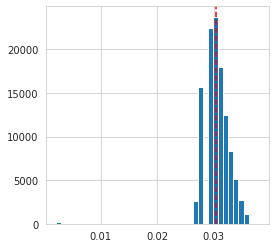

mean:0.0304, std:0.0022


(0.0304, 0.0022)

In [12]:
#df[df[chem_cols[0]]>0.025][chem_cols[0]].hist(bins=100)
stat_feat(df[chem_cols[0]])

  Xимический состав c сертификата НЛМК_Si       (%)


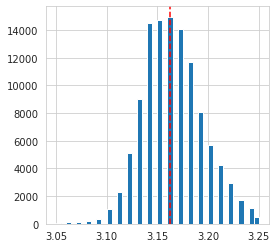

mean:3.1629, std:0.03


(3.1629, 0.03)

In [13]:
print(chem_cols[1])
stat_feat(df[chem_cols[1]])
#df[chem_cols[1]].hist(bins=100)

Входной контроль ВИЗа_Si       (%)


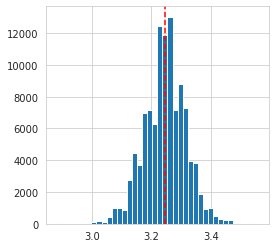

mean:3.2444, std:0.0706


(3.2444, 0.0706)

In [14]:
print(chem_cols_viz[1])
stat_feat(df[chem_cols_viz[1]])

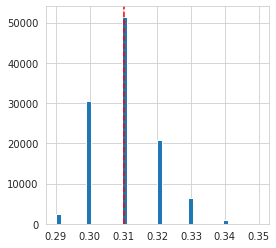

mean:0.3101, std:0.0092


(0.3101, 0.0092)

In [15]:
stat_feat(df[chem_cols[2]])

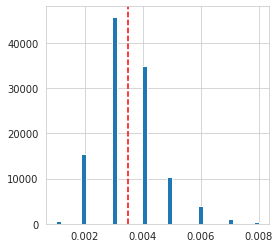

mean:0.0035, std:0.0011


(0.0035, 0.0011)

In [16]:
stat_feat(df[chem_cols[3]])

In [17]:
# for zone in t_obezugler_cols:
#     stat_feat(df[zone])

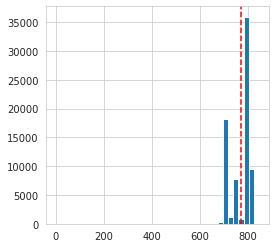

mean:770.4336, std:43.8956


(770.4336, 43.8956)

In [18]:
stat_feat(df[t_obezugler_cols[1]])

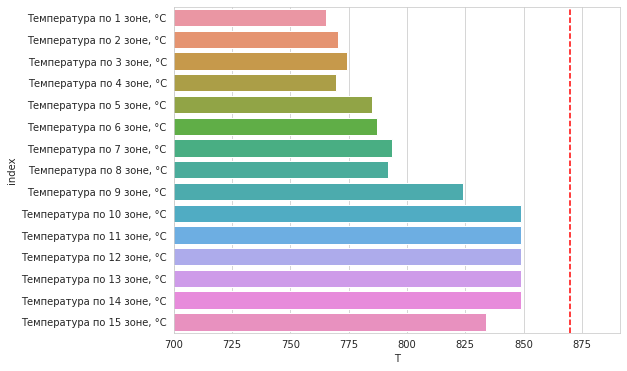

In [19]:
t_obezugler = df[t_obezugler_cols].describe().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=t_obezugler[t_obezugler['index']=='mean'].T[1:].reset_index().rename(columns={1:'T'}), x='T', y='index')
plt.axvline(870, color='red', linestyle='--')
plt.xlim(700)
plt.show()

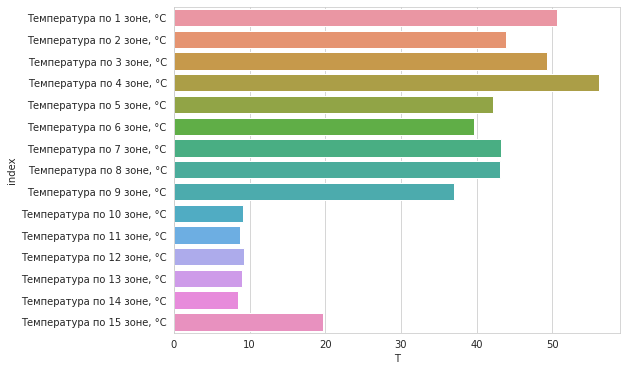

In [20]:
t_obezugler = df[t_obezugler_cols].describe().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=t_obezugler[t_obezugler['index']=='std'].T[1:].reset_index().rename(columns={2:'T'}), x='T', y='index')
#plt.axvline(870, color='red', linestyle='--')
#plt.xlim(700)
plt.show()

In [21]:
for t in t_obezugler_cols:
    df = df[df[t]>400]

df

,В100 (Тл) лист лучший,В800 (Тл) лист лучший,"P1,5/50 (Вт / Кг) лист лучший","P1,7/50 (Вт / Кг) лист лучший",В100 (Тл) лист худший,В800 (Тл) лист худший,"P1,5/50 (Вт / Кг) лист худший","P1,7/50 (Вт / Кг) лист худший",В100 (Тл) Эпштейн лучший,В800 (Тл) Эпштейн лучший,...,"Длительность снижения скорости разливки менее рабочей, мин, ручей 2 [М06-19]",Признак снижения уровня металла в п/к ниже регламентированных значений [М06-11],Признак снижения уровня металла в п/к ниже регламентированных значений [М06-19],Расход аргона на защитную трубу стальковша.2,Отсутствие результатов химического анализа проб металла после продувки в конвертере,Продолжительность транспортировки плавки после последнего агрегата внепечной обработки до УНРС [М06-10],Признак обработки на УДЧ,Признак использования различных видов ферросилиция для легирования стали,Признак вида ферросилиция,Признак посада различных марок стали без замены промежуточного ковша
1078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.833333,NaN,0.0,0.0,0.0,35.0,УДЧ,NaN,ФС65,0.0
1079,1.69,1.88,0.65,0.96,1.67,1.86,0.67,1.00,1.75,1.88,...,2.833333,NaN,0.0,0.0,0.0,35.0,УДЧ,NaN,ФС65,0.0
1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.833333,NaN,0.0,0.0,0.0,35.0,УДЧ,NaN,ФС65,0.0
1081,1.68,1.87,0.66,1.01,1.68,1.87,0.66,1.02,1.74,1.88,...,2.833333,NaN,0.0,0.0,0.0,35.0,УДЧ,NaN,ФС65,0.0
1082,1.68,1.87,0.66,1.01,1.67,1.87,0.68,1.05,1.74,1.88,...,2.833333,NaN,0.0,0.0,0.0,35.0,УДЧ,NaN,ФС65,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,0.0,28.0,УДЧ,NaN,NaN,0.0
112629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,0.0,28.0,УДЧ,NaN,NaN,0.0
112630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,25.0,УДЧ,NaN,NaN,0.0
112631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,25.0,УДЧ,NaN,NaN,0.0


In [22]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                               "There are " + str(mis_val_table_ren_columns.shape[0]) +
           " columns that have missing values.")
    return mis_val_table_ren_columns

In [23]:
missing_values_table(df[chem_cols])

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Xимический состав c сертификата НЛМК_Ti (%),117,0.2
Xимический состав c сертификата НЛМК_Sn (%),101,0.2


In [24]:
#df = df[df[chem_cols].notna()]
df = df[df[chem_cols].isna().sum(axis=1)==0]

In [175]:
df = df[df[chem_cols_viz].isna().sum(axis=1)==0]

In [176]:
missing_values_table(df[chem_cols])

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [177]:
df[t_obezugler_cols].fillna(method='ffill', inplace=True)

/tmp/ipykernel_587232/1202093947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[t_obezugler_cols].fillna(method='ffill', inplace=True)


In [178]:
df['В800  (Тл) лист худший'] = df['В800  (Тл) лист худший'].fillna(method='ffill')

/tmp/ipykernel_587232/3812248373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['В800  (Тл) лист худший'] = df['В800  (Тл) лист худший'].fillna(method='ffill')


In [179]:
df[df['В800  (Тл) лист лучший']>=1.8]['В800  (Тл) лист лучший'].value_counts()

1.88    21675
1.87    13087
1.89     8820
1.86     4312
1.85     1996
1.84      769
1.83      242
1.90      145
1.82      109
1.81       54
1.80       31
1.91       25
1.92       14
1.94        3
1.93        2
Name: В800  (Тл) лист лучший, dtype: int64

## Temperature by zone VS B800

In [180]:
for zone in range(15):
    num_T = zone
    df[t_obezugler_cols[num_T]+'_rnd'] = df[t_obezugler_cols[num_T]].round(0)

/tmp/ipykernel_587232/1880866840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[t_obezugler_cols[num_T]+'_rnd'] = df[t_obezugler_cols[num_T]].round(0)


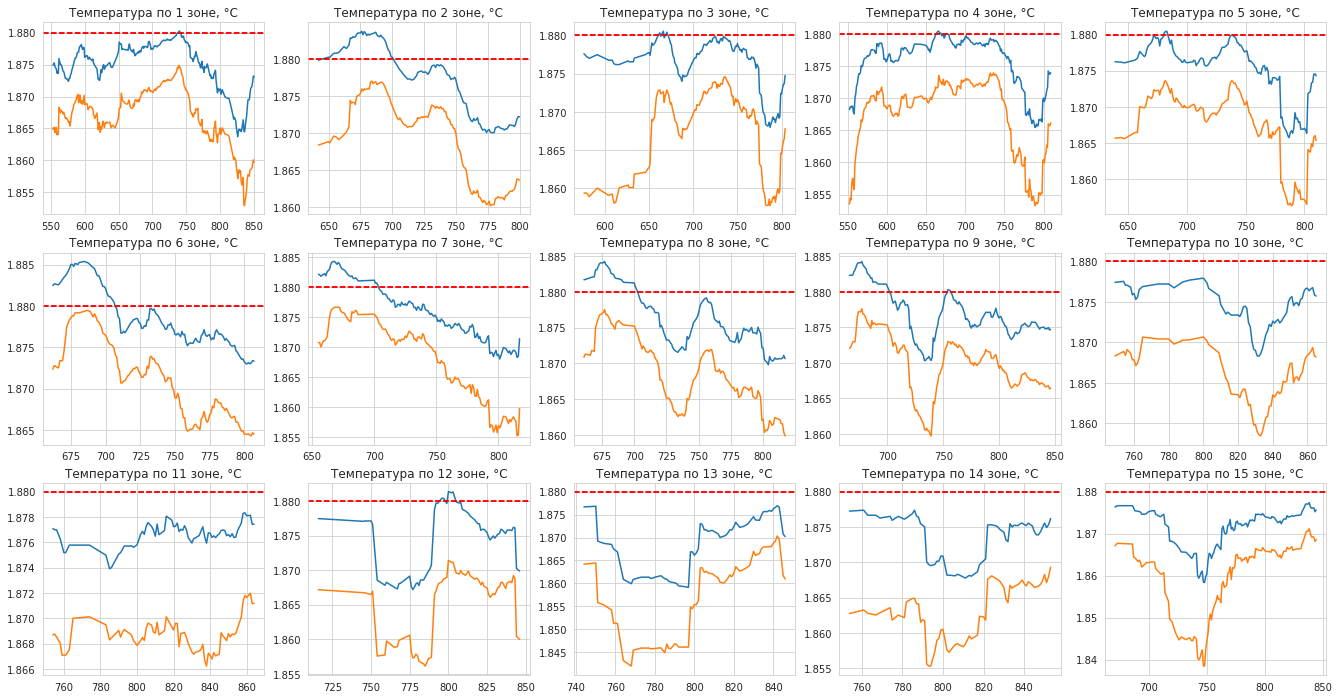

In [181]:
targets = ['В800  (Тл) лист лучший', 'В800  (Тл) лист худший']
aver_size = 20

fig, axs = plt.subplots(3, 5, figsize=(23, 12))
i=0
for zone in range(15):
    #plt.figure(figsize=(8,6))
    num_T = zone
    j = zone // 5
    for target in targets:
        temp = df.groupby(t_obezugler_cols[num_T]+'_rnd').mean().reset_index()[[target, t_obezugler_cols[num_T]+'_rnd']]
        temp.sort_values(t_obezugler_cols[num_T]+'_rnd', inplace=True)
        temp['aver B'] = temp[target].rolling(aver_size, closed='both', center=True, axis=0).mean()

        axs[j, i].plot(temp[t_obezugler_cols[num_T]+'_rnd'], temp['aver B'])
        axs[j, i].axhline(1.88, color='red', linestyle='--')
        axs[j, i].set_title(t_obezugler_cols[num_T])
    i += 1
    i%=5
#plt.figure(figsize=(20,12))
plt.show()

# Split targen distributin on BAD and GOOD

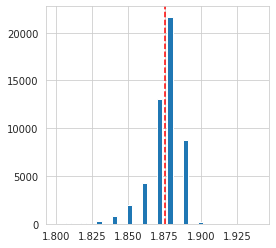

mean:1.8753, std:0.012


In [182]:
mean, std = stat_feat(df[df['В800  (Тл) лист лучший'] >= 1.8]['В800  (Тл) лист лучший'])
bad_B = mean

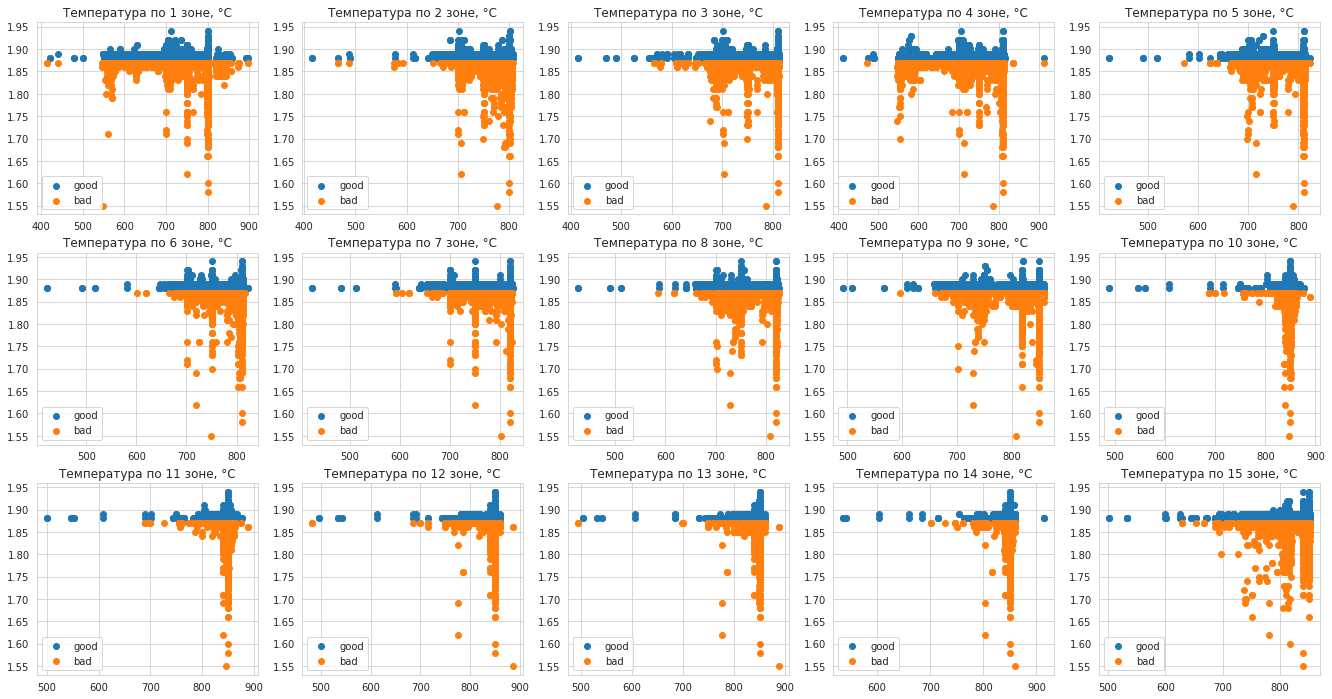

In [183]:
targets = ['В800  (Тл) лист лучший', 'В800  (Тл) лист худший']

fig, axs = plt.subplots(3, 5, figsize=(23, 12))
i=0
for zone in range(15):
    #plt.figure(figsize=(8,6))
    num_T = zone
    j = zone // 5
    for target in targets[:1]:

        x = df[df[target]>=bad_B][t_obezugler_cols[num_T]]
        y = df[df[target]>=bad_B][target]
        axs[j, i].scatter(x=x, y=y, label='good')

        x = df[df[target]<bad_B][t_obezugler_cols[num_T]]
        y = df[df[target]<bad_B][target]
        axs[j, i].scatter(x=x, y=y, label='bad')
        axs[j, i].set_title(t_obezugler_cols[num_T])
        axs[j, i].legend()
    i += 1
    i%=5
#plt.figure(figsize=(20,12))
plt.show()

## 1. Clustering

### 1.1 Temperature

In [184]:
chem_cols

['  Xимический состав c сертификата НЛМК_C  (%)',
 '  Xимический состав c сертификата НЛМК_Si       (%)',
 '  Xимический состав c сертификата НЛМК_Mn  (%)',
 '  Xимический состав c сертификата НЛМК_S  (%)',
 '  Xимический состав c сертификата НЛМК_P  (%)',
 '  Xимический состав c сертификата НЛМК_Cr  (%)',
 '  Xимический состав c сертификата НЛМК_Ni  (%)',
 '  Xимический состав c сертификата НЛМК_Cu  (%)',
 '  Xимический состав c сертификата НЛМК_Al  (%)',
 '  Xимический состав c сертификата НЛМК_N  (%)',
 '  Xимический состав c сертификата НЛМК_Ti  (%)',
 '  Xимический состав c сертификата НЛМК_Sn (%)']

In [414]:
#claster_cols = t_obezugler_cols[:9] + ['Толщина назначения, мм'] + chem_cols_viz
claster_cols = chem_cols_viz
claster_cols

['Входной контроль ВИЗа_C  (%)',
 'Входной контроль ВИЗа_Si       (%)',
 'Входной контроль ВИЗа_Mn  (%)',
 'Входной контроль ВИЗа_S  (%)',
 'Входной контроль ВИЗа_SAl  (%)',
 'Входной контроль ВИЗа_TAl  (%)',
 'Входной контроль ВИЗа_N  (%)',
 'Входной контроль ВИЗа_Ti  (%)',
 'Входной контроль ВИЗа_TAl2N']

In [415]:
min_max_scaler = preprocessing.StandardScaler()
scaled_df = min_max_scaler.fit_transform(df[claster_cols])
scaled_df = pd.DataFrame(scaled_df, columns=claster_cols, index=df[claster_cols].index)
scaled_df

,Входной контроль ВИЗа_C (%),Входной контроль ВИЗа_Si (%),Входной контроль ВИЗа_Mn (%),Входной контроль ВИЗа_S (%),Входной контроль ВИЗа_SAl (%),Входной контроль ВИЗа_TAl (%),Входной контроль ВИЗа_N (%),Входной контроль ВИЗа_Ti (%),Входной контроль ВИЗа_TAl2N
1078,1.040243,1.474749,-0.174503,-0.896859,-0.341480,-0.136177,0.004488,-0.247929,0.048662
1079,1.040243,1.474749,-0.174503,-0.896859,-0.341480,-0.136177,0.004488,-0.247929,0.048662
1080,1.040243,1.474749,-0.174503,-0.896859,-0.341480,-0.136177,0.004488,-0.247929,0.048662
1081,1.040243,1.474749,-0.174503,-0.896859,-0.341480,-0.136177,0.004488,-0.247929,0.048662
1082,1.040243,1.474749,-0.174503,-0.896859,-0.341480,-0.136177,0.004488,-0.247929,0.048662
...,...,...,...,...,...,...,...,...,...
112628,-0.436661,1.185614,0.674677,-0.081334,0.003099,-0.323210,-0.502812,0.011091,0.217804
112629,-0.436661,1.185614,0.674677,-0.081334,0.003099,-0.323210,-0.502812,0.011091,0.217804
112630,-0.288970,-1.055179,2.599483,-0.489097,-0.028226,-0.198521,0.004488,0.399619,-0.175322
112631,-0.288970,-1.055179,2.599483,-0.489097,-0.028226,-0.198521,0.004488,0.399619,-0.175322


### TSne + DBSCAN

In [416]:
#tsne = manifold.TSNE(n_components = 2, init = 'random', early_exaggeration=10.0, perplexity=90, learning_rate=50.0, random_state = 0, n_jobs=-1)
tsne = manifold.TSNE(n_components = 2, init = 'random', early_exaggeration=10.0, perplexity=120, learning_rate=50, random_state = 0, n_jobs=-1)
df_2d_tsne = tsne.fit_transform(scaled_df)
df_2d_tsne

array([[ 22.26494 ,  11.057716],
       [ 22.264671,  11.05793 ],
       [ 22.26494 ,  11.057716],
       ...,
       [ 40.919678, -11.135582],
       [ 40.92007 , -11.135099],
       [ 40.91819 , -11.136198]], dtype=float32)

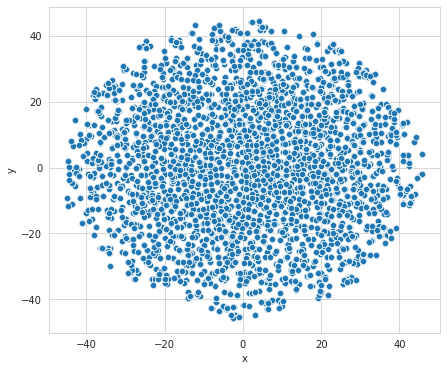

In [417]:
df_2d_tsne = pd.DataFrame(df_2d_tsne, columns=['x', 'y'], index=df[claster_cols].index)
plt.figure(figsize=(7, 6))
sns.scatterplot(x='x', y='y', data=df_2d_tsne)
plt.show()

In [390]:
df_2d_tsne_dbscan = DBSCAN(eps=1.3, min_samples=80).fit_predict(df_2d_tsne)
df_2d_tsne_dbscan = pd.DataFrame(df_2d_tsne_dbscan, columns=['cluster'], index=df[claster_cols].index)
#df_2d_tsne_dbscan

num clusters: 40


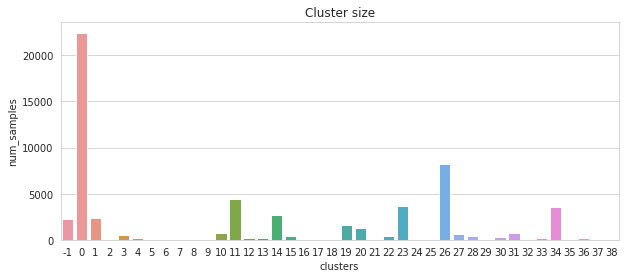

In [391]:
val, count = np.unique(df_2d_tsne_dbscan, return_counts=True)
print('num clusters:', len(val))
# print('clusters:', val)
# print('number samples in cluster: ', count)
d = {'clusters': val, 'num_samples': count}
df_stat_clstr = pd.DataFrame(data=d)
plt.figure(figsize=(10, 4))
sns.barplot(data=df_stat_clstr, x='clusters', y='num_samples')
plt.title("Cluster size")
plt.show()

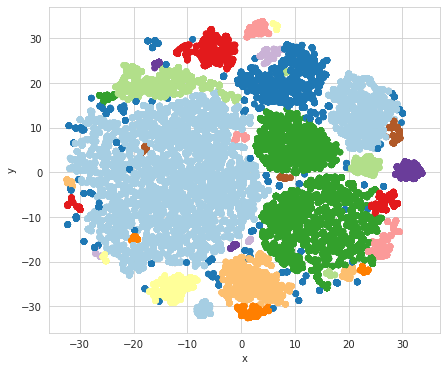

In [392]:
plt.figure(figsize = (7, 6))
sns.scatterplot(x='x', y='y', hue=["cluster-{}".format(x) for x in df_2d_tsne_dbscan.values],
                edgecolor=None, data=df_2d_tsne, palette="Paired", legend=False)
plt.show()

In [393]:
df_clstr = pd.concat([df, df_2d_tsne, df_2d_tsne_dbscan], axis=1)

In [394]:
targets = ['В800  (Тл) лист лучший', 'В800  (Тл) лист худший']
df_clstr['quality'] = 'bad'
idx = df_clstr[df_clstr[targets[0]]>=bad_B].index
df_clstr.loc[idx, 'quality'] = 'good'
df_clstr[['x', 'y', 'cluster', 'quality']]

,x,y,cluster,quality
1078,-13.100203,-9.443493,0,bad
1079,-13.100203,-9.443493,0,good
1080,-13.100188,-9.443480,0,bad
1081,-13.100188,-9.443480,0,bad
1082,-13.100188,-9.443480,0,bad
...,...,...,...,...
112628,7.306166,-11.175112,26,bad
112629,7.306220,-11.175179,26,bad
112630,14.533962,-24.340931,26,bad
112631,14.534087,-24.340855,26,bad


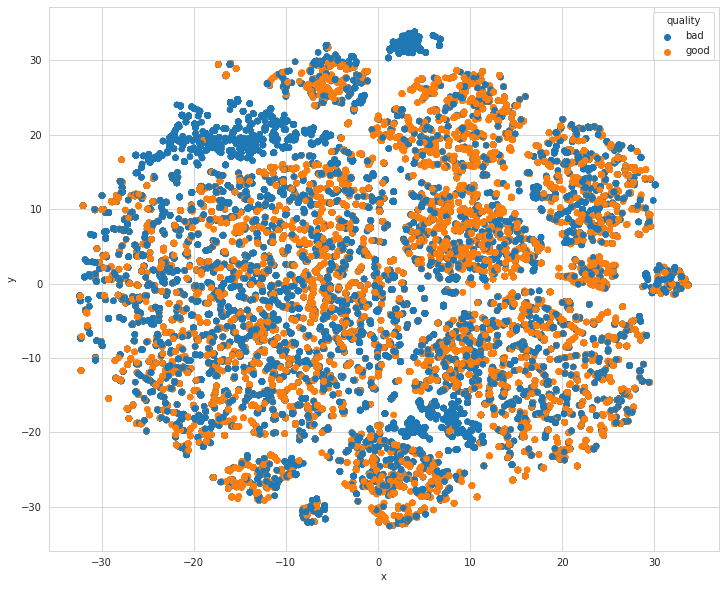

In [395]:
plt.figure(figsize = (12, 10))
#sns.scatterplot(x='x', y='y', hue='cluster', edgecolor=None, data=df_clstr, palette="Paired", legend=False)
#plt.scatter(x=df_clstr[df_clstr['quality']=='good']['x'], y=df_clstr[df_clstr['quality']=='good']['y'], alpha=0.1, marker='.')
sns.scatterplot(x='x', y='y', hue='quality', edgecolor=None, data=df_clstr, legend=True)
plt.show()

In [396]:
df_clstr_grp_clstr = df_clstr.groupby(['cluster', 'quality']).size().reset_index().rename(columns={0:'count'})
df_clstr_grp_clstr

df_clstr_grp_clstr['%count'] = df_clstr_grp_clstr.groupby('cluster')['count'].apply(lambda x: round((x / x.sum())*100,2))
df_clstr_grp_clstr

,cluster,quality,count,%count
0,-1,bad,1239,55.31
1,-1,good,1001,44.69
2,0,bad,11422,50.88
3,0,good,11029,49.12
4,1,bad,2160,91.02
...,...,...,...,...
71,36,good,161,74.88
72,37,bad,36,38.71
73,37,good,57,61.29
74,38,bad,21,22.58


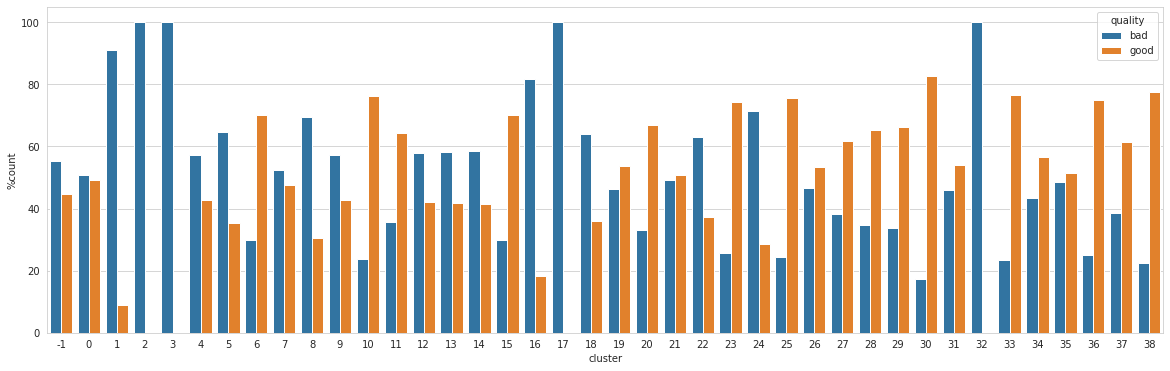

In [397]:
plt.figure(figsize = (20, 6))
sns.barplot(data=df_clstr_grp_clstr, x='cluster', y='%count', hue='quality')
plt.show()

In [398]:
df_clstr_grp_clstr.sort_values('cluster')

,cluster,quality,count,%count
0,-1,bad,1239,55.31
1,-1,good,1001,44.69
2,0,bad,11422,50.88
3,0,good,11029,49.12
4,1,bad,2160,91.02
...,...,...,...,...
71,36,good,161,74.88
72,37,bad,36,38.71
73,37,good,57,61.29
74,38,bad,21,22.58


In [399]:
good_bad_condition = 60

In [400]:
good_clusters = df_clstr_grp_clstr[(df_clstr_grp_clstr['quality']=='good') & (df_clstr_grp_clstr['%count']>=good_bad_condition)]['cluster'].to_list()
good_clusters

[6, 10, 11, 15, 20, 23, 25, 27, 28, 29, 30, 33, 36, 37, 38]

In [401]:
bad_clusters = df_clstr_grp_clstr[(df_clstr_grp_clstr['quality']=='bad') & (df_clstr_grp_clstr['%count']>=good_bad_condition)]['cluster'].to_list()
bad_clusters

[1, 2, 3, 5, 8, 16, 17, 18, 22, 24, 32]

## Show good clusters

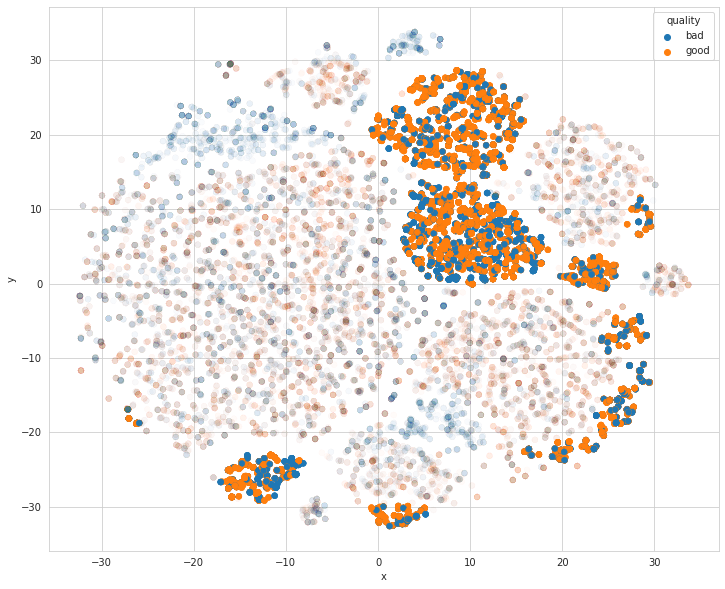

In [402]:
plt.figure(figsize = (12, 10))
sns.scatterplot(x='x', y='y', hue='quality', edgecolor=None, data=df_clstr[df_clstr['cluster'].isin(good_clusters)], legend=True)
sns.scatterplot(x='x', y='y', hue='quality', edgecolor=None, data=df_clstr[~df_clstr['cluster'].isin(good_clusters)], alpha=0.01, legend=False)
plt.show()

## Show bad clusters

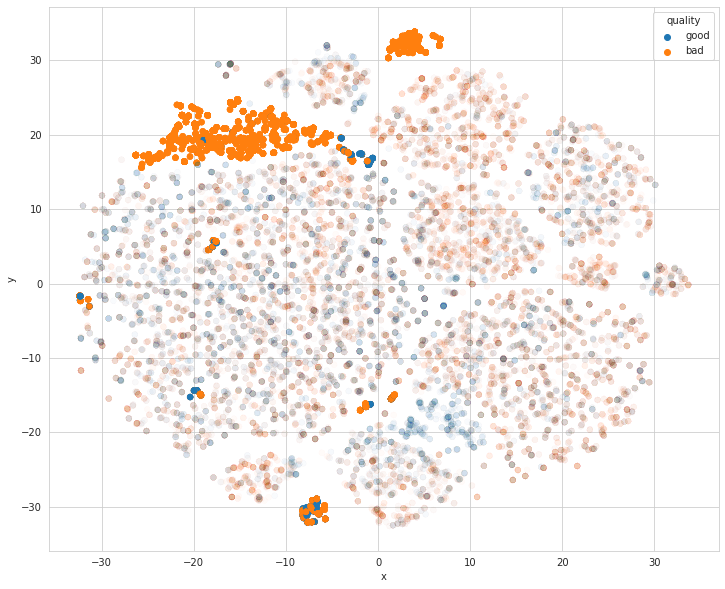

In [403]:
plt.figure(figsize = (12, 10))
sns.scatterplot(x='x', y='y', hue='quality', edgecolor=None, data=df_clstr[df_clstr['cluster'].isin(bad_clusters)], legend=True)
sns.scatterplot(x='x', y='y', hue='quality', edgecolor=None, data=df_clstr[~df_clstr['cluster'].isin(bad_clusters)], alpha=0.01, legend=False)
plt.show()

In [404]:
df_clstr[df_clstr['cluster'].isin(good_clusters)][claster_cols]

,"Температура по 1 зоне, °С","Температура по 2 зоне, °С","Температура по 3 зоне, °С","Температура по 4 зоне, °С","Температура по 5 зоне, °С","Температура по 6 зоне, °С","Температура по 7 зоне, °С","Температура по 8 зоне, °С","Температура по 9 зоне, °С","Толщина назначения, мм",Входной контроль ВИЗа_C (%),Входной контроль ВИЗа_Si (%),Входной контроль ВИЗа_Mn (%),Входной контроль ВИЗа_S (%),Входной контроль ВИЗа_SAl (%),Входной контроль ВИЗа_TAl (%),Входной контроль ВИЗа_N (%),Входной контроль ВИЗа_Ti (%),Входной контроль ВИЗа_TAl2N
13707,799.9319,799.9348,809.9319,809.9607,809.9904,809.9948,819.9822,819.9978,819.9978,0.27,0.0320,3.02,0.3350,0.0050,0.0130,0.0160,0.0110,0.005,1.4950
13708,799.9319,799.9348,809.9319,809.9607,809.9904,809.9948,819.9822,819.9978,819.9978,0.27,0.0320,3.02,0.3350,0.0050,0.0130,0.0160,0.0110,0.005,1.4950
13709,799.9319,799.9348,809.9319,809.9607,809.9904,809.9948,819.9822,819.9978,819.9978,0.27,0.0320,3.02,0.3350,0.0050,0.0130,0.0160,0.0110,0.005,1.4950
14778,800.0109,800.0167,810.0232,809.9703,809.9993,809.9877,820.0007,819.9899,819.9913,0.27,0.0320,3.10,0.3450,0.0060,0.0140,0.0150,0.0110,0.002,1.3640
14779,800.0109,800.0167,810.0232,809.9703,809.9993,809.9877,820.0007,819.9899,819.9913,0.27,0.0320,3.10,0.3450,0.0060,0.0140,0.0150,0.0110,0.002,1.3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112602,717.7056,713.0400,697.2808,712.2504,750.0504,749.8360,749.8424,749.9184,850.0584,0.27,0.0345,3.08,0.3105,0.0045,0.0138,0.0155,0.0111,0.006,1.3919
112621,717.3664,712.7960,696.4540,712.1624,750.0088,750.2758,750.2528,750.1376,850.1024,0.27,0.0345,3.08,0.3105,0.0045,0.0138,0.0155,0.0111,0.006,1.3919
112622,717.3664,712.7960,696.4540,712.1624,750.0088,750.2758,750.2528,750.1376,850.1024,0.27,0.0345,3.08,0.3105,0.0045,0.0138,0.0155,0.0111,0.006,1.3919
112623,717.3664,712.7960,696.4540,712.1624,750.0088,750.2758,750.2528,750.1376,850.1024,0.27,0.0345,3.08,0.3105,0.0045,0.0138,0.0155,0.0111,0.006,1.3919


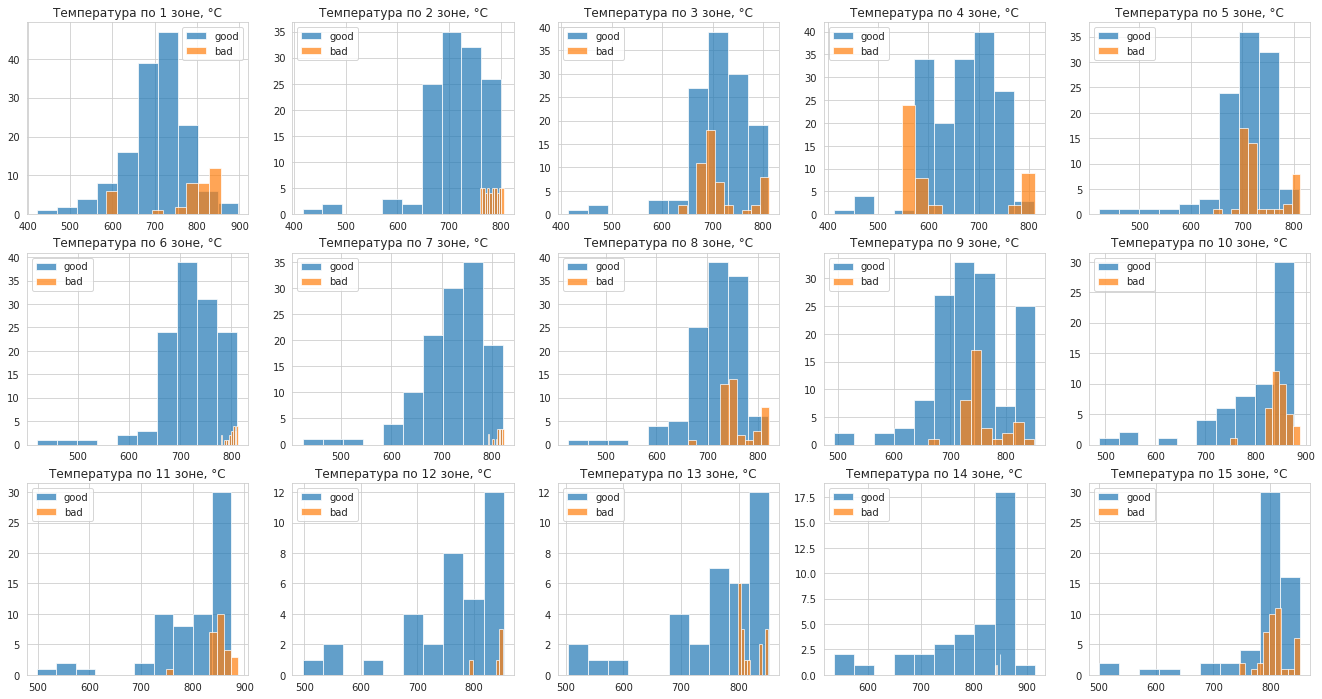

In [413]:
targets = ['В800  (Тл) лист лучший', 'В800  (Тл) лист худший']
aver_size = 20

fig, axs = plt.subplots(3, 5, figsize=(23, 12))
i=0
for zone in range(15):
    #plt.figure(figsize=(8,6))
    num_T = zone
    j = zone // 5
    #for target in targets:
    for idx, row in pd.DataFrame([good_clusters, bad_clusters]).set_index(pd.Series(['good', 'bad'])).iterrows():
        temp = df_clstr[df_clstr['cluster'].isin(row.values)].groupby(t_obezugler_cols[num_T]+'_rnd').mean().reset_index()[[target, t_obezugler_cols[num_T]+'_rnd']]
        temp.sort_values(t_obezugler_cols[num_T]+'_rnd', inplace=True)
        temp['aver B'] = temp[target].rolling(aver_size, closed='both', center=True, axis=0).mean()

        #axs[j, i].plot(temp[t_obezugler_cols[num_T]+'_rnd'], temp['aver B'], label=idx)
        axs[j, i].hist(temp[t_obezugler_cols[num_T]+'_rnd'], label=idx, alpha=0.7)
        #axs[j, i].axhline(1.88, color='red', linestyle='--')
        axs[j, i].set_title(t_obezugler_cols[num_T])
        axs[j, i].legend()
    i += 1
    i%=5
#plt.figure(figsize=(20,12))
plt.show()

In [ ]:
df[t_obezugler_cols].min().min(), df[t_obezugler_cols].max().max()

In [ ]:
t_obezugler_cols[0]

In [ ]:
t_min = int(df[t_obezugler_cols].min().min())
t_max = int(df[t_obezugler_cols].max().max())
T_prev = t_min
step = 10
for T in range(t_min+step, t_max, step):
#for T in range(t_min+10, t_min+40, 10):
    for zone in t_obezugler_cols:
        #print(T, zone)
        idx = (df[zone] >= T_prev) & (df[zone] < T)
        df.loc[df[idx].index, 'В800  (Тл) лист худший_' + zone] = df[idx]['В800  (Тл) лист худший'].mean()
        #print(df[idx].index, df[idx]['В800  (Тл) лист худший'].mean())

    T_prev = T

In [ ]:
df['В800  (Тл) лист худший_' + t_obezugler_cols[0]].hist()

In [ ]:
num_T = 0
plt.figure(figsize=(8,6))
sns.scatterplot(data=df[df['В800  (Тл) лист худший']>=bad_B], x=t_obezugler_cols[num_T], y='В800  (Тл) лист худший', label='good')
sns.scatterplot(data=df[df['В800  (Тл) лист худший']<bad_B], x=t_obezugler_cols[num_T], y='В800  (Тл) лист худший', label='bad')
plt.legend()
plt.show()

In [ ]:
df['Время начала'] = pd.to_datetime(df['Время начала'])
df['Время начала'].min(), df['Время начала'].max()

In [ ]:
df = df[df['Время начала'] < pd.to_datetime('2022-01-01')]

In [ ]:
df_target = pd.DataFrame()
#file_list = ['Source/att_VIZ_2020.csv', 'Source/att_VIZ_2021.csv', 'Source/att_VIZ_2022.csv']
file_list = ['Source/att_VIZ_2021.csv']
# pd.read_csv(file, header=2)
for i in file_list:
    dt = pd.read_csv(i, header=2)
    df_target = pd.concat([df_target, dt])

In [ ]:
df_target.head(3)

In [ ]:
for col in df_target.columns:
    print(col)

In [ ]:
df_target['№ партии ГКР'].sort_values()

In [ ]:
for col in df_target.columns:
    #print(col)
    if 'Вес' in col:
        print(col)

In [ ]:
df_target[df_target['№ партии ГКР'] == 400001]['Вес рулона после обработки, т']

In [ ]:
df_target[df_target['№ партии ГКР'] == 400001]['Вес рулона после обработки, т'].values.astype('float')

In [ ]:
df['№ партии ГКР'].sort_values()

In [ ]:
df[df['№ партии ГКР'] == 400001]

In [ ]:
for col in df.columns:
    #print(col)
    if 'Вес' in col:
        print(col)

In [ ]:
df[df['№ партии ГКР'] == 400001][['Вес рулона, т', 'Вес рулона до отбора проб']]

In [ ]:
df[['Время начала', '№ плавки']].sort_values(by='Время начала').groupby(pd.Grouper(key='Время начала', freq='1D')).count().plot(figsize=(20, 20))

In [ ]:
df.columns

In [ ]:
unique_df = []

for i in df.columns:
    print(i+'  ---   '+str(df[i].nunique()))
    unique_df.append([i, df[i].nunique()])

In [ ]:
dfu = pd.DataFrame(unique_df).rename(columns={0:'feature',
                                      1:'nunique'})

In [ ]:
dfu.sort_values(by='nunique')['nunique'].plot.bar(figsize=(20, 20))

In [ ]:
dfu.sort_values(by='nunique')[dfu['nunique']>1000]['nunique'].plot.bar(figsize=(20, 20))

In [ ]:
len(dfu.sort_values(by='nunique')[dfu['nunique']>1000]['nunique'].values)

In [ ]:
df.shape

In [ ]:
musor = dfu[dfu['nunique']<2]
musor

In [ ]:
dfu[(dfu['nunique'].between(2, 10))]

In [ ]:
data = dfu[dfu['nunique']>1]
good_columns = data['feature'].values

data

In [ ]:
good_columns

In [ ]:
df.shape

In [ ]:
df.isna().sum().sort_values()

In [ ]:
df[good_columns].isna().sum().sort_values()[-20:]

In [ ]:
df[good_columns].isna().sum().sort_values()[df[good_columns].isna().sum().sort_values()<df.shape[0]*0.5]

In [ ]:
really_good_cols = list(df[good_columns].isna().sum().sort_values()[df[good_columns].isna().sum().sort_values()<df.shape[0]*0.5].index)

In [ ]:
quan_cols = []
qual_cols = []

for i in really_good_cols:
    try:
        if df[i].astype('str').apply(lambda x: x.replace(',', '.')).astype('float').dropna().std() > 0:
            quan_cols.append(i)
        else: 
            qual_cols.append(i)
    except:
        qual_cols.append(i)
        continue
        

In [ ]:
quan_cols

In [ ]:
qual_cols

In [ ]:
len(quan_cols), len(qual_cols), len(quan_cols)+len(qual_cols), len(really_good_cols)

In [ ]:
series = 0

fig, axs = plt.subplots(len(quan_cols[10*series:10*(1+series)]),2)
fig.suptitle('Экзогенные переменные')
fig.tight_layout(pad = 3)
fig.set_figheight(30)
fig.set_figwidth(20)

for i, column in enumerate(quan_cols[10*series:10*(1+series)]):
    if i%2==0:
        shift = 0
    else: shift = 1

    sns.histplot(ax=axs[0+i-shift, 0+shift], x=df[column].astype('str').apply(lambda x: x.replace(',', '.')).astype('float'))
    #axs[0+i-shift, 0+shift].set_title('Гистограмма переменной '+str(column))

    sns.lineplot(ax=axs[1+i-shift, 0+shift], x=df['Время начала'], y=df[column].astype('str').apply(lambda x: x.replace(',', '.')).astype('float'))
    #axs[1+i-shift, 0+shift].set_title('График по наблюдениям переменной '+str(column))

In [ ]:
series = 1

fig, axs = plt.subplots(len(quan_cols[10*series:10*(1+series)]),2)
fig.suptitle('Экзогенные переменные')
fig.tight_layout(pad = 3)
fig.set_figheight(30)
fig.set_figwidth(20)

for i, column in enumerate(quan_cols[10*series:10*(1+series)]):
    if i%2==0:
        shift = 0
    else: shift = 1

    sns.histplot(ax=axs[0+i-shift, 0+shift], x=df[column].astype('str').apply(lambda x: x.replace(',', '.')).astype('float'))
    #axs[0+i-shift, 0+shift].set_title('Гистограмма переменной '+str(column))

    sns.lineplot(ax=axs[1+i-shift, 0+shift], x=df['Время начала'], y=df[column].astype('str').apply(lambda x: x.replace(',', '.')).astype('float'))
    #axs[1+i-shift, 0+shift].set_title('График по наблюдениям переменной '+str(column))

In [ ]:
not_found_input_TZ = ['Химический состав стали, мас. %', 
             'Расчетная температура выдачи слябов',
             'Режим обжатий в черновой группе клетей (степень деформации и -)', # Оценка неплоскостности полосы за клетью, Процент длины полосы, не достигшей заданный НД диапазон по температуре за 5 клетью?
             'Режим обжатия в чистовой группе клетей (степень деформации и -)', #
             'Температура конца чистовой прокатки', #Температура за 12 клетью<?
             'Высота местных утолщений' 
            ]

not_found_output_TZ = ['Доля металла с нормируемым уровнем удельных магнитных потерь', 
                'Целевого уровня удельных магнитных потерь', 
                 'Доля металла 1 категории качества',
                'Отклонением от плоскостности',
                'Доля несоответствующей продукции на ЭАС по дефектам плоскостности' #
                ]

defects = ['Количество дефектов на полосе в СККП', # Как интерпритируем
 'СККП: Наибольшая критичность дефекта на полосе',
 'Код дефекта' - 2,
 'Дефект' - 2,
 'Количество прокатных дефектов с верхней стороны (М12-02'), 
 'Количество сталеплавильных дефектов с верхней стороны (М12-02)', 
 'Количество прокатных дефектов с нижней стороны (М12-02)',
 'Количество сталеплавильных дефектов с нижней стороны (М12-02)', 
 'Суммарное количество дефектов с верхней стороны полосы (М12-02)',
 'Суммарное количество дефектов с нижней стороны полосы (М12-02)'
]

In [ ]:
#Какими параметрами можем управлять?

input_params = [ #также есть некоторые производные - средние, среднеквадратические отклонения
    'Толщина проката', 'Ширина проката', 'Вес рулона, т', 
    'Температура посада', 
    'Время начала'-'Время посада в печь', 'Время нагрева',
    'Средняя температура сляба в сварочной зоне', 'Средняя температура сляба в сварочной зоне', 'Температура за 5 клетью', 'Температура за 12 клетью',
    'Давление в системе гидросбивов', 'Признак включения гидросбива за ВОЛ', ...
    'Скорость клети №№№', 'Скорость клети №12 холостого хода (заданная оператором)', # все доступные номера
    'Температура воды для душирования', 
    'Температура смотки',
    'RM-312. Разнотолщинность', 'RM-312 Разнотолщинность', # одно и тоже?
    'Прикромочная клиновидность со стороны привода (среднее)', 'Прикромочная клиновидность со стороны обслуживания (среднее)', 'Величина средней клиновидности полосы (М12-02)', 
    'RM-312. Профиль: смещение выпуклости (ср. скан)', 
    'Коэффициент детерминации поперечного профиля полосы (М12-02)', 'Коэффициент детерминации поперечного профиля полосы (М12-02)', 
    ]

output_params = ['Толщина за 12 клетью', ?]

#Что замеряется на выходе из стана. По каким парамтрам принимается решение о будущей толщине (0.23, 0.27, 0.30)
Ольков Станистлав Александрович (Директор техдирекции по ЭТС) - После стана замеряются "Какие-то" параметры 
и на их основании принимается решение о будущей толщине. Есть ли эти параметры в датасете или где их взять? 
Какое правило принятия решения?

In [ ]:
df['Дефект'].value_counts()

In [ ]:
df['Количество прокатных дефектов с верхней стороны (М12-02)'].value_counts()

# backup

In [ ]:
df[good_columns].select_dtypes(exclude=[object])

In [ ]:
quality_columns = list(df.std()[df.std().isna()].index)
quantity_columns = list(df.std()[-(df.std().isna())].index)

In [ ]:
df.astype('float').std()[-df.std().isna()]

In [ ]:
list(df.std())

In [ ]:
df

In [ ]:
df.groupby('№ партии ГКР').nunique()['Рулон']

In [ ]:
df.groupby('№ партии ГКР').nunique()['Рулон'].max()

In [ ]:
df.groupby('№ плавки').nunique()['Рулон']

In [ ]:
df.groupby('№ плавки').nunique()['Рулон'].max()

In [ ]:
df['Марка стали'].unique()

In [ ]:
df['Марка-аналог 2'].unique()

In [ ]:
df['Марка-аналог 3'].unique()

In [ ]:
df['Марка проката СГП'].unique()

In [ ]:
for i in df.columns:
    print(i+'  ---   '+str(df[i].nunique()))